In [1]:
pwd

'/home/rilab607/juhan_ws/RoboManipBaselines/robo_manip_baselines/act/notebooks'

In [2]:
import torch 


model_state_dict = torch.load("/home/rilab607/juhan_ws/RoboManipBaselines/robo_manip_baselines/act/ckpts/MujocoUR5eCable_ACT_20241028/policy_best.ckpt")

/home/rilab607/miniconda3/envs/RoboManipBaselines/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# model_state_dict

In [4]:
# for n,v in model_state_dict.items():
#     print("name :",n, v.shape)

In [5]:
import torch
import numpy as np
import sys
import os
import pickle
import argparse
import matplotlib.pyplot as plt
from copy import deepcopy
from tqdm import tqdm
from robo_manip_baselines.act import load_data

sys.path.append("../../../third_party/act")
from utils import compute_dict_mean, set_seed, detach_dict
from policy import ACTPolicy
from detr.models.detr_vae import DETRVAE

In [6]:
from robo_manip_baselines.act.bin.TrainAct import TrainAct
train_act = TrainAct(jupyter=True,batch_size=6, dataset_dir="../data/MujocoUR5eCable_20241028_official/", log_dir="../log/MujocoUR5eCable_jupyter_test_/",  task_name = "MujocoUR5eCable", state_dim=7, chunk_size=92)

kwargs :  {'batch_size': 6, 'dataset_dir': '../data/MujocoUR5eCable_20241028_official/', 'log_dir': '../log/MujocoUR5eCable_jupyter_test_/', 'task_name': 'MujocoUR5eCable', 'state_dim': 7, 'chunk_size': 92}
Updating batch_size to 6
Updating dataset_dir to ../data/MujocoUR5eCable_20241028_official/
Updating log_dir to ../log/MujocoUR5eCable_jupyter_test_/
Updating task_name to MujocoUR5eCable
Updating state_dim to 7
Updating chunk_size to 92

Data from: ../data/MujocoUR5eCable_20241028_official/

globbed_list :  [PosixPath('../data/MujocoUR5eCable_20241028_official/train/joints.npy')]
globbed_list :  [PosixPath('../data/MujocoUR5eCable_20241028_official/train/actions.npy')]
globbed_list :  [PosixPath('../data/MujocoUR5eCable_20241028_official/test/joints.npy')]
globbed_list :  [PosixPath('../data/MujocoUR5eCable_20241028_official/test/actions.npy')]
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  37
globbed_list :  [PosixPath('../data/MujocoUR5eCable_202410

/home/rilab607/miniconda3/envs/RoboManipBaselines/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rilab607/miniconda3/envs/RoboManipBaselines/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


number of parameters: 83.90M
KL Weight 10


In [7]:
train_act.policy

ACTPolicy(
  (model): DETRVAE(
    (transformer): Transformer(
      (encoder): TransformerEncoder(
        (layers): ModuleList(
          (0): TransformerEncoderLayer(
            (self_attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
            )
            (linear1): Linear(in_features=512, out_features=3200, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
            (linear2): Linear(in_features=3200, out_features=512, bias=True)
            (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
            (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
            (dropout1): Dropout(p=0.1, inplace=False)
            (dropout2): Dropout(p=0.1, inplace=False)
          )
          (1): TransformerEncoderLayer(
            (self_attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
 

# load dataset

In [8]:
for batch_idx, data in enumerate(train_act.train_dataloader):
    print(batch_idx)
    # if batch_idx == 5:
    #     print(batch_idx , data)
    #     break
    

self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  6
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  84
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  72
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  30
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  90
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  53
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  27
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  74
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  1
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  62
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  66
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  53
self.dataset_dir  ../data/Mujo

In [9]:
data[0].shape

torch.Size([6, 1, 3, 480, 640])

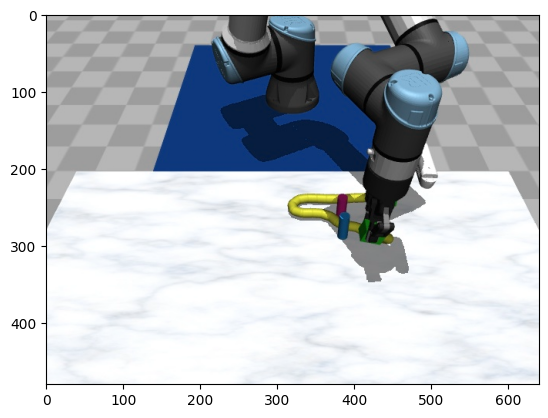

In [10]:
img_ = data[0][0][0].permute(1,2,0)
plt.imshow(img_.detach().cpu())

In [11]:
data[1].shape

torch.Size([6, 7])

In [12]:
data[2].shape, data[3].shape

(torch.Size([6, 92, 7]), torch.Size([6, 92]))

In [13]:
torch.sum(torch.where(data[3]==True,1,0),dim=1)

tensor([55, 44, 92, 90, 59, 19])

In [14]:
len(train_act.train_dataloader), len(train_act.val_dataloader)

(4, 1)

In [15]:
for k,v in train_act.train_dataloader.dataset.norm_stats.items():
    print(k, v.shape)

action_mean (7,)
action_std (7,)
joint_mean (7,)
joint_std (7,)
example_joint (6, 92, 7)


In [16]:
train_act.train_dataloader.dataset

In [17]:
train_act.args.dataset_dir

'../data/MujocoUR5eCable_20241028_official/'

In [221]:
from pathlib import Path
def load_array(dir_path, glob_pattern):
    globbed_list = list(dir_path.glob(glob_pattern))
    print("globbed_list : ", globbed_list)
    assert len(globbed_list) == 1
    return np.load(globbed_list[0])

dir_path = Path(train_act.args.dataset_dir)
train_dataset_dir = dir_path / "train"
val_dataset_dir =  dir_path / "test"

# data가 너무 많아 버리면 어떻게 사용하나 ? ㅋㅋㅋ 
# 이미지에서 학습하는 방식으로 주소만 가져오고 npy 파일 다 긁어오게 만들어야겠네. 
original_action = load_array(train_dataset_dir, "**/actions.npy")[12]
original_action_shape = original_action.shape
episode_len = original_action_shape[0]

original_mask = load_array(train_dataset_dir, "**/masks.npy")[5].astype(
    bool
)

globbed_list :  [PosixPath('../data/MujocoUR5eCable_20241028_official/train/actions.npy')]
globbed_list :  [PosixPath('../data/MujocoUR5eCable_20241028_official/train/masks.npy')]


In [227]:
original_action_shape

(92, 7)

In [124]:
len(train_act.train_dataloader.dataset), len(train_act.val_dataloader.dataset)

(24, 6)

In [222]:
pad_ = train_act.train_dataloader.dataset[5][-1]

pad_, torch.sum(pad_), pad_.shape

self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  59


(tensor([False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True]),
 tensor(72),
 torch.Size([92]))

In [225]:
start_ts = 23 
mask = original_mask[start_ts:]

action_len = episode_len - start_ts
print("action_len", action_len)
padded_mask = np.zeros(episode_len, dtype=bool)
padded_mask[:action_len] = mask
is_pad = ~padded_mask


action_len 69


In [226]:
is_pad

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [52]:
train_act.args.camera_names

['front']

In [19]:
train_act.train_dataloader.dataset[23]

start_ts :  67


(tensor([[[[0.6941, 0.7020, 0.7098,  ..., 0.6235, 0.6275, 0.6314],
           [0.7020, 0.7059, 0.7137,  ..., 0.6157, 0.6196, 0.6235],
           [0.7098, 0.7137, 0.7176,  ..., 0.6118, 0.6157, 0.6196],
           ...,
           [0.9843, 0.9843, 0.9843,  ..., 0.9647, 0.9647, 0.9647],
           [0.9882, 0.9882, 0.9843,  ..., 0.9725, 0.9725, 0.9725],
           [0.9922, 0.9882, 0.9843,  ..., 0.9765, 0.9765, 0.9765]],
 
          [[0.6941, 0.7020, 0.7098,  ..., 0.6235, 0.6275, 0.6314],
           [0.7020, 0.7059, 0.7137,  ..., 0.6157, 0.6196, 0.6235],
           [0.7098, 0.7137, 0.7176,  ..., 0.6118, 0.6157, 0.6196],
           ...,
           [0.9922, 0.9922, 0.9922,  ..., 0.9725, 0.9725, 0.9725],
           [0.9961, 0.9961, 0.9922,  ..., 0.9804, 0.9804, 0.9804],
           [1.0000, 0.9961, 0.9922,  ..., 0.9843, 0.9843, 0.9843]],
 
          [[0.6941, 0.7020, 0.7098,  ..., 0.6235, 0.6275, 0.6314],
           [0.7020, 0.7059, 0.7137,  ..., 0.6157, 0.6196, 0.6235],
           [0.7098, 0.71

In [7]:
lr_backbone = 1e-5
backbone = "resnet18"
enc_layers = 4
dec_layers = 7
nheads = 8
policy_config = {
    "lr": self.args.lr,
    "num_queries": self.args.chunk_size,
    "kl_weight": self.args.kl_weight,
    "hidden_dim": self.args.hidden_dim,
    "dim_feedforward": self.args.dim_feedforward,
    "lr_backbone": lr_backbone,
    "backbone": backbone,
    "enc_layers": enc_layers,
    "dec_layers": dec_layers,
    "nheads": nheads,
    "camera_names": self.args.camera_names,
    "state_dim"  : self.args.state_dim, 
}

self.policy = ACTPolicy(policy_config)

policy.ACTPolicy